In [1]:
import importlib
import plots
importlib.reload(plots)

import statistics

from marketenvironment import MarketEnvironment
from simulation import run_episode

# RL-Environment

In [2]:
sim_env = MarketEnvironment(num_agents=5, costs=5, sigma=2)
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


Varianz oder Standardabweichung der Rewards

In [3]:
inner_dict = round_info[0]
rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]
steps = sorted(round_info.keys())

rewards = {}

for rz in rz_keys:
    rewards = [round_info[s][rz]["actual_reward"] for s in steps]
    mean = statistics.mean(rewards)
    varianz = statistics.variance(rewards)
    stdev = statistics.stdev(rewards)
    print(rz, "Mean", mean, "Varianz", varianz, "Standardabweichung", stdev)

RZ1 Mean 3.54328125 Varianz 11.525450227176835 Standardabweichung 3.394915349044337
RZ2 Mean 3.4234375 Varianz 11.994856290630079 Standardabweichung 3.463359105064053
RZ3 Mean 3.38196875 Varianz 11.627404862131204 Standardabweichung 3.409898072102919
RZ4 Mean 3.48796875 Varianz 10.521037566219215 Standardabweichung 3.2436148917865104
RZ5 Mean 3.33709375 Varianz 12.02211275530535 Standardabweichung 3.467291847437327


Unterschiede beim Mean Reward liegen bei < 0.07.

Interpretation:
- Kein Agent dominiert langfristig
- Keine systematische Benachteiligung
- Dein Mechanismus ist symmetrisch / fair

Standardabweichung $`\sigma`$ ~ 3.3–3.5

Verglichen mit dem Mittelwert ($`\mu`$~3.45):

$`\frac{\sigma}{\mu}`$~1

=> Die Rewards schwanken stark von Runde zu Runde.

a) Kosten sind zufällig
- Kosten ~ Normal(5, 2), abgeschnitten auf [1, 10]
- Jede Runde komplett neue Realisation
- → Einkommen stark zufallsgetrieben

b) Marktpreis schwankt
- Preis = ⌈Mittelwert der aktuellen Kosten⌉
- → Preis variiert ebenfalls zufällig
- → Earnings = Preis − Kosten ist volatil

c) Wettbewerb & Bieten
- Ob du gewinnst / verlierst ist stochastisch
- Selbst bei gleicher Strategie

Warum Mean positive (~3.4)?

Erwartungswert grob:
- Kostenmittel: 5
- Marktpreis: ≈ 5–6 (ceil des Mittels)
- Earnings ≈ 0–1 pro Job
- Durch Bieten / Marktmechanismus kommt zusätzlicher Gewinn

👉 Der Markt erzeugt systematisch positiven Überschuss für Agenten.

Das bedeutet:
- Das System ist nicht „zero-sum“
- Es gibt positiven social welfare

Marktpreise

In [6]:
bids = [v["bids"] for v in round_info.values()]

#avg_bid = statistics.mean([b for sublist in bids for b in sublist if b > 0])
#total_bids = sum(bids)

In [ ]:
# avg_bid

NameError: name 'avg_bid' is not defined

In [ ]:
# total_bids

1.7646875

Barplot: Anzahl bearbeiteter Aufträge pro Agent

In [ ]:
round_info[0]

{'RZ1': {'obs': (0, 1),
  'state': '(loss;medium_competition)',
  'action': 0,
  'action_name': 'list_job',
  'cost': 7,
  'possible_earnings': -3,
  'received_bid': 0,
  'actual_reward': 2.0},
 'RZ2': {'obs': (2, 1),
  'state': '(profit;medium_competition)',
  'action': 0,
  'action_name': 'list_job',
  'cost': 2,
  'possible_earnings': 2,
  'received_bid': 0.25,
  'actual_reward': 0.25},
 'RZ3': {'obs': (2, 1),
  'state': '(profit;medium_competition)',
  'action': 2,
  'action_name': 'bid_0.25',
  'cost': 3,
  'possible_earnings': 1,
  'won_bid': 0.25,
  'actual_reward': 1.75},
 'RZ4': {'obs': (2, 1),
  'state': '(profit;medium_competition)',
  'action': 0,
  'action_name': 'list_job',
  'cost': 3,
  'possible_earnings': 1,
  'received_bid': 0,
  'actual_reward': 1.0},
 'RZ5': {'obs': (2, 1),
  'state': '(profit;medium_competition)',
  'action': 0,
  'action_name': 'list_job',
  'cost': 3,
  'possible_earnings': 1,
  'received_bid': 0,
  'actual_reward': 1.0},
 'mean_reward': 1.2,
 '

In [ ]:
# TODO

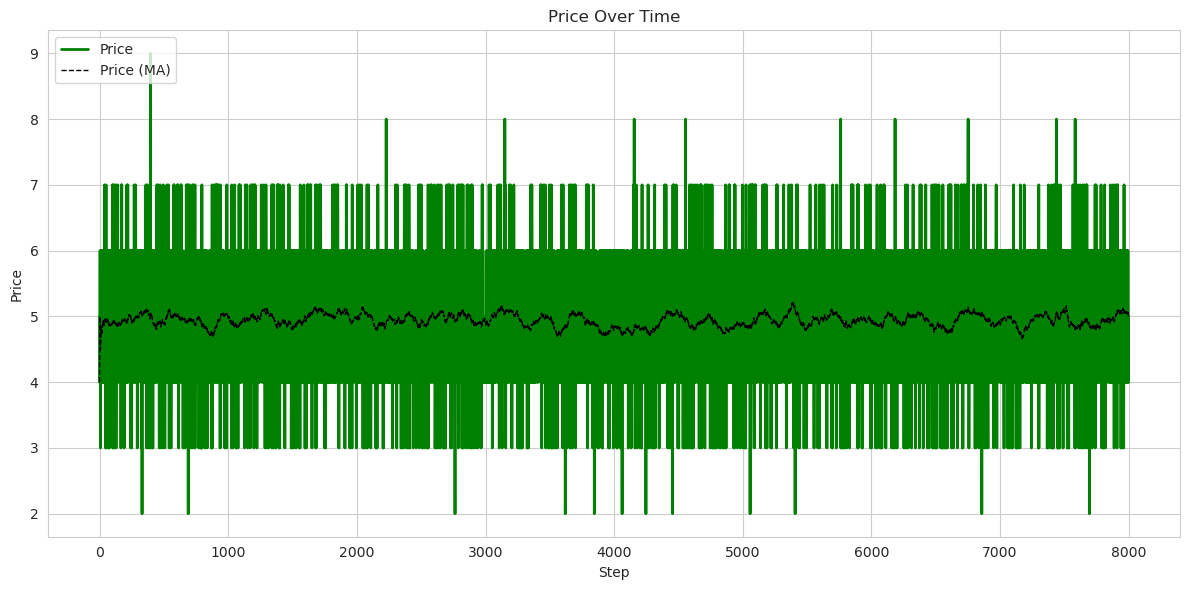

In [ ]:
plots.plot_price(round_info)

Plotting Q-Tables
Agent RZ1


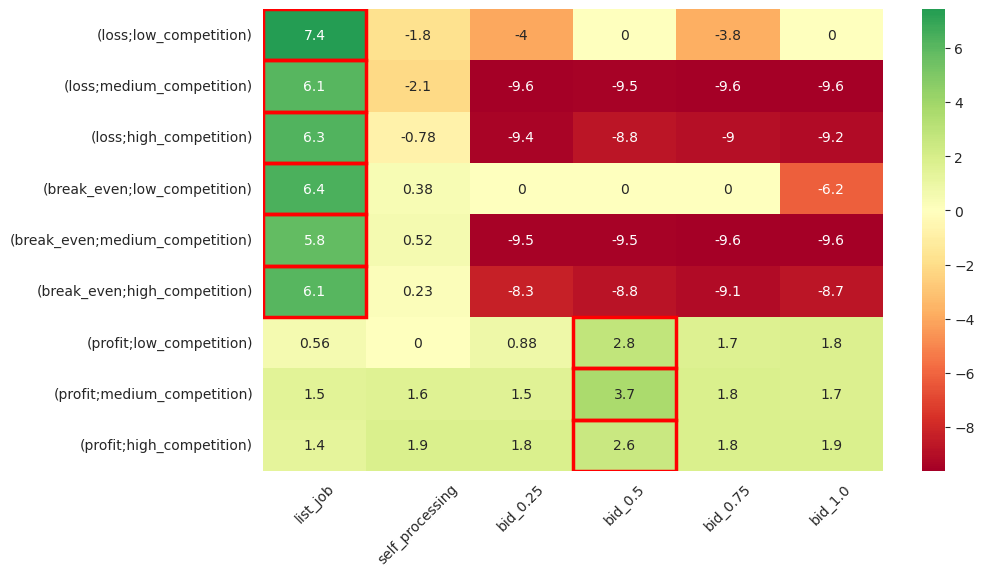

Agent RZ2


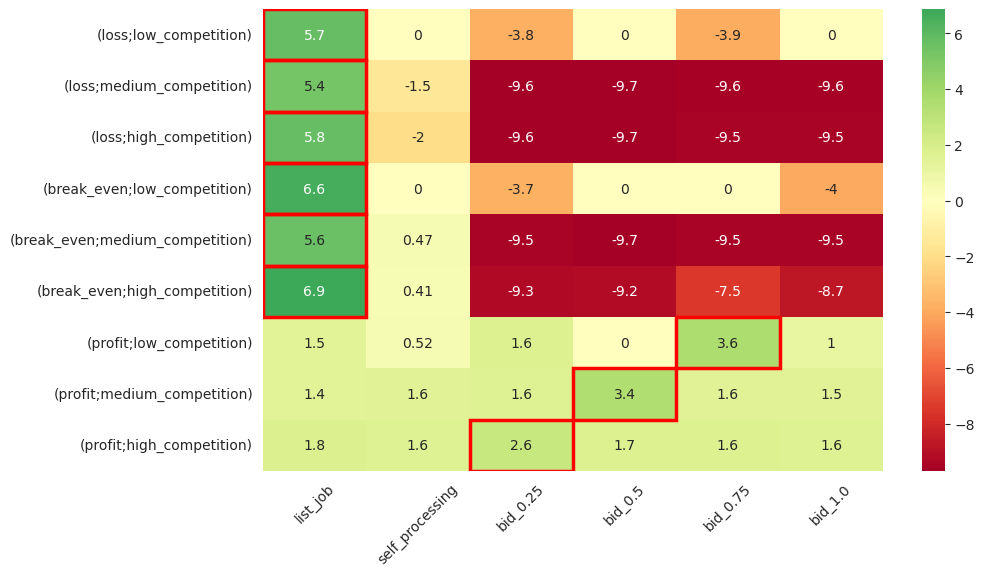

Agent RZ3


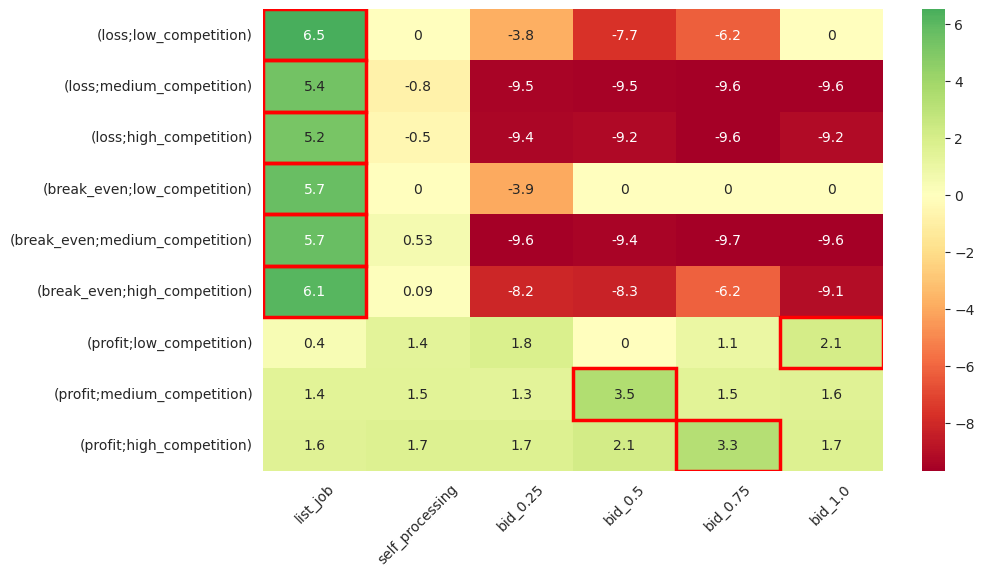

Agent RZ4


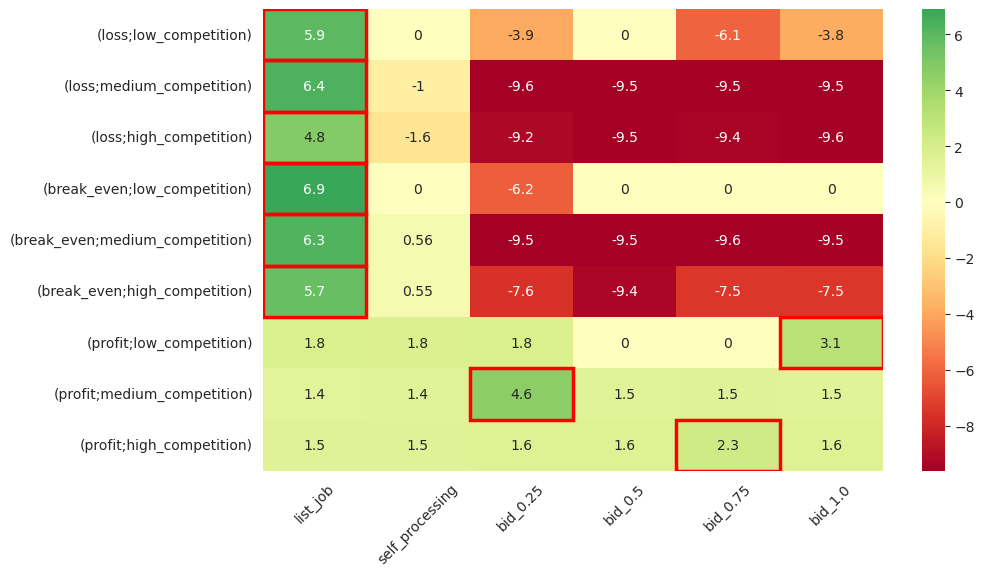

Agent RZ5


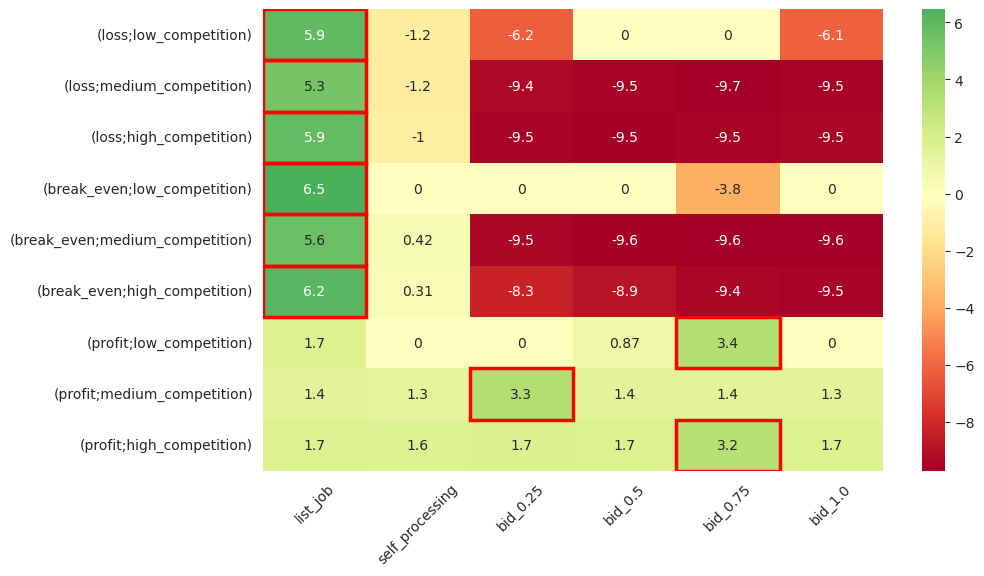

In [ ]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name}")
    plots.plot_q_tables(agent)

Plotting Rewards


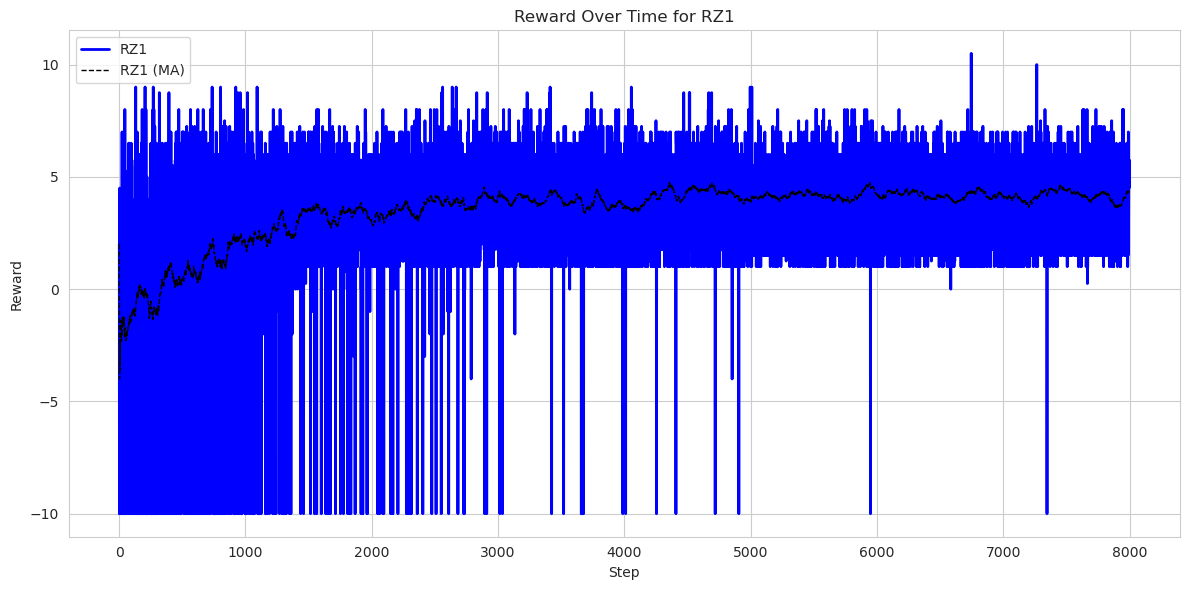

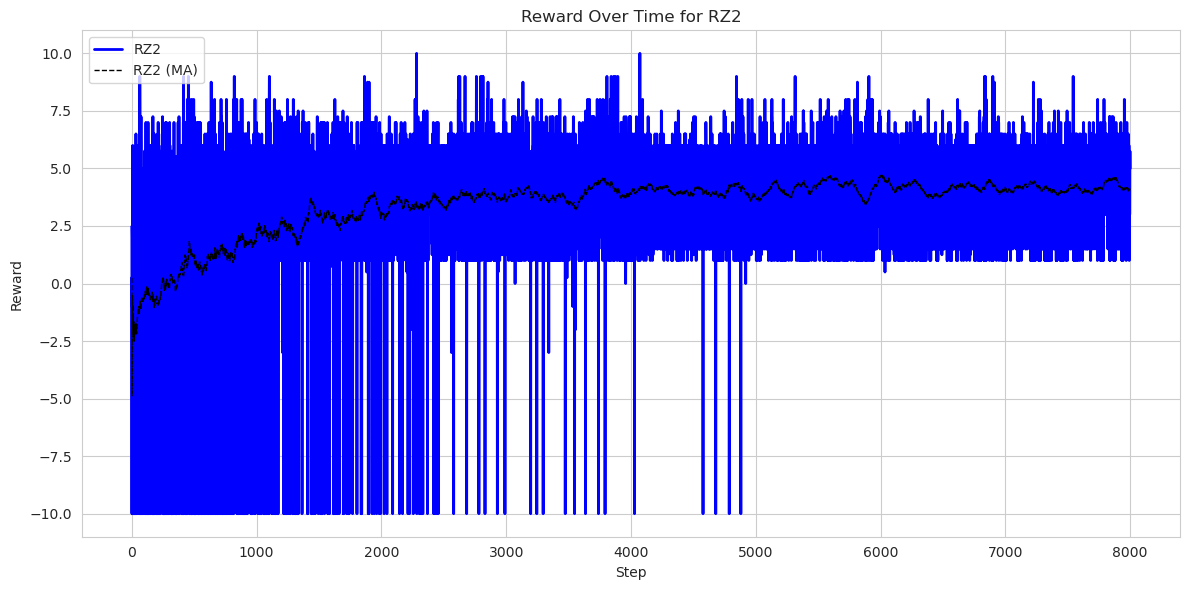

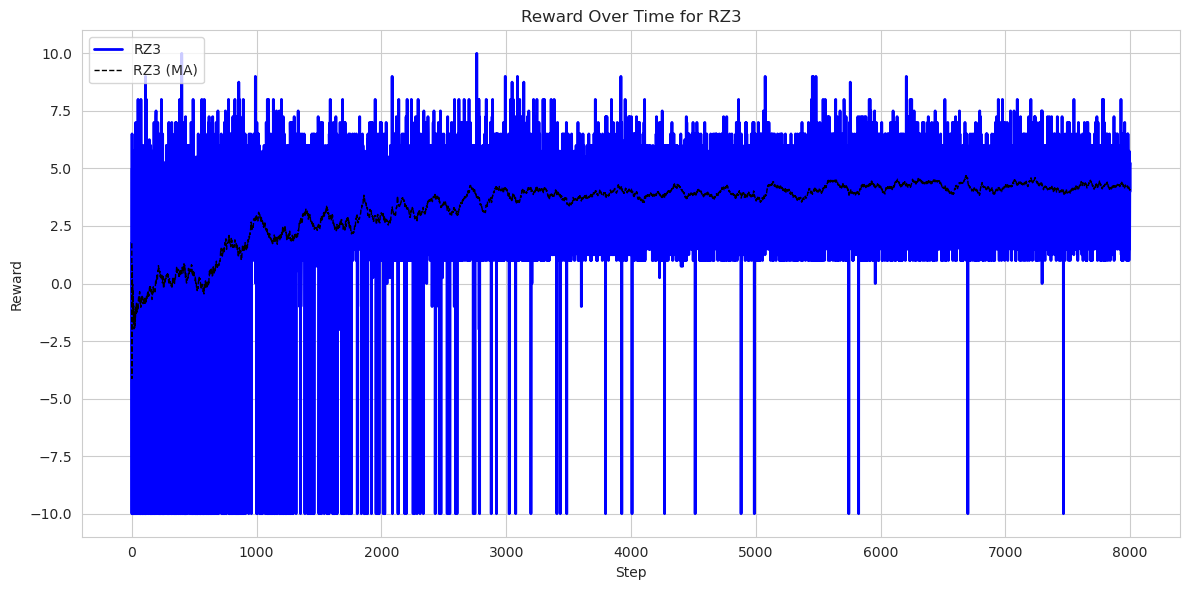

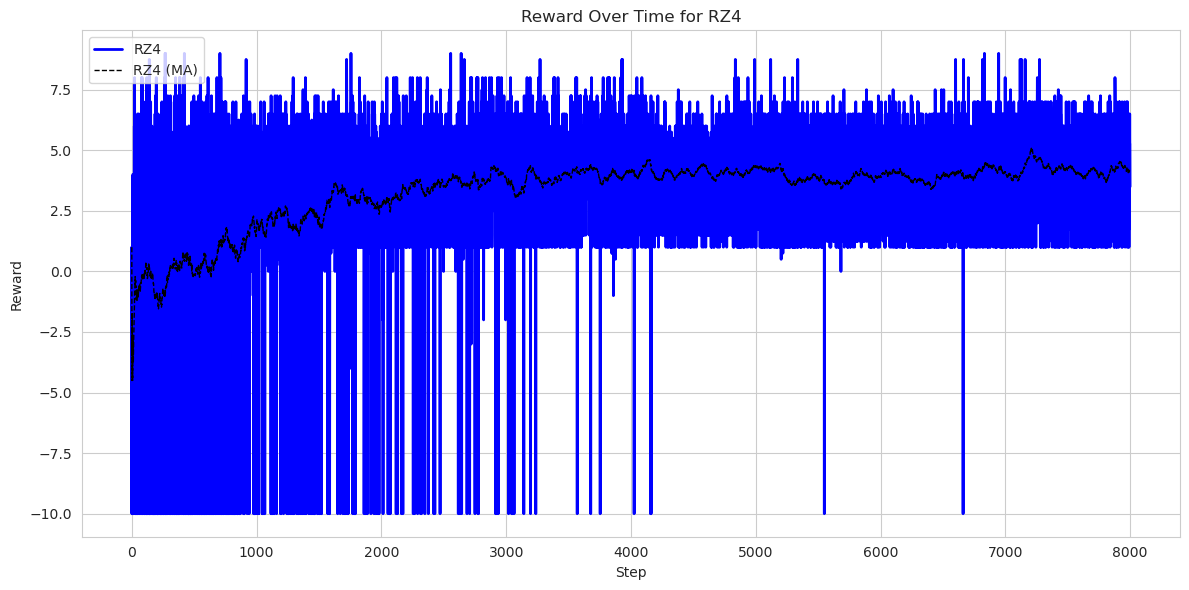

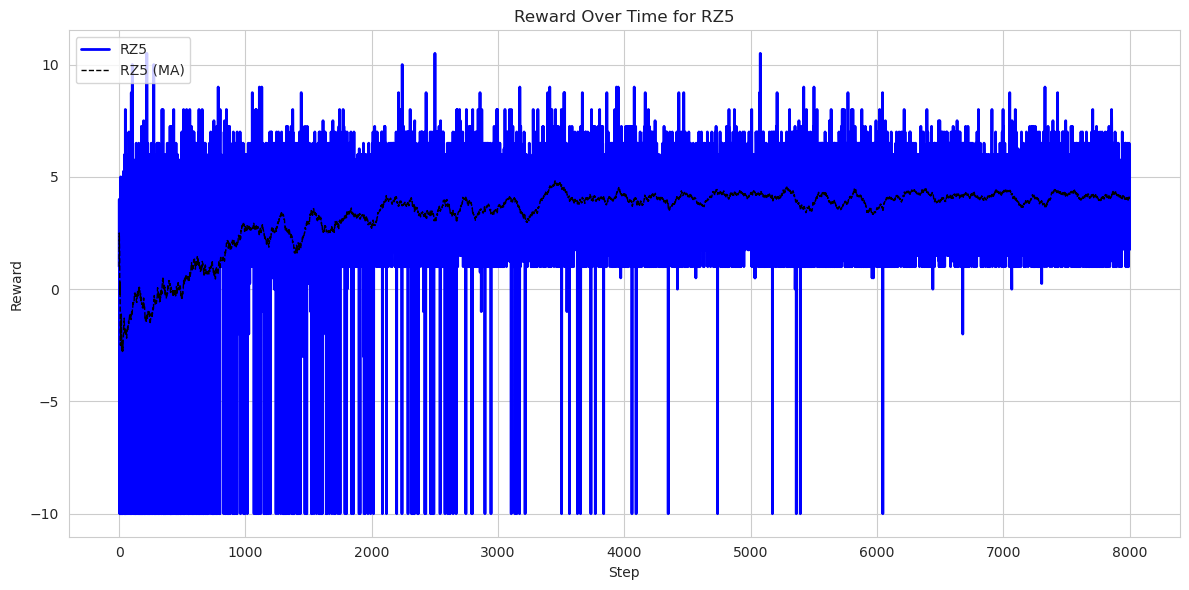

In [ ]:
print("Plotting Rewards")
for agent in sim_env.agents.values():
    plots.plot_reward_for(agent.name, round_info)

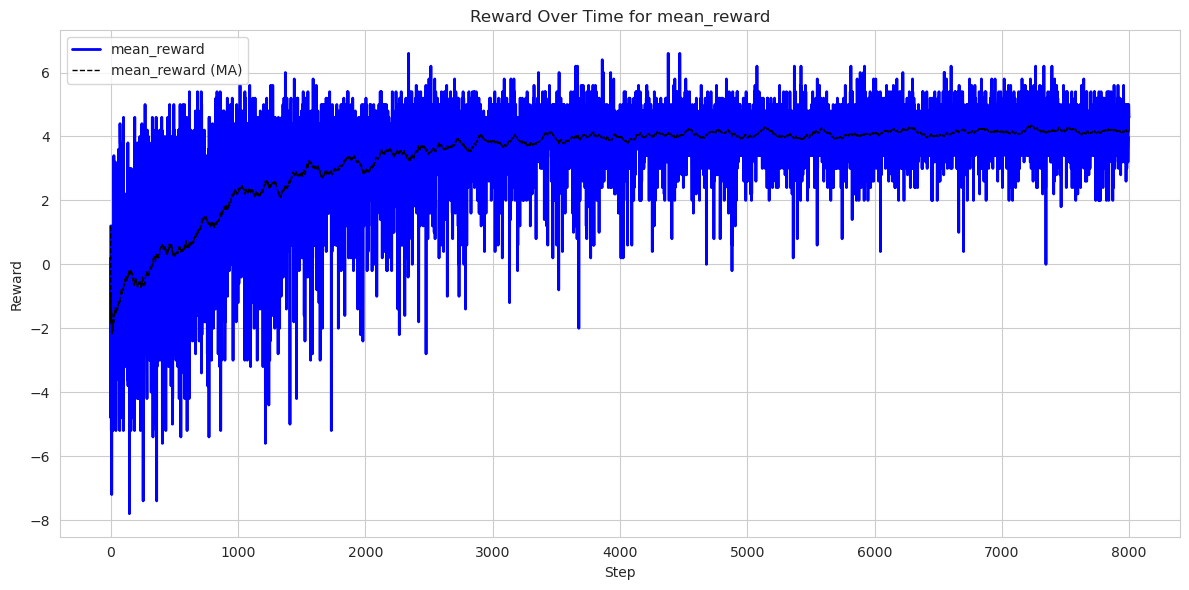

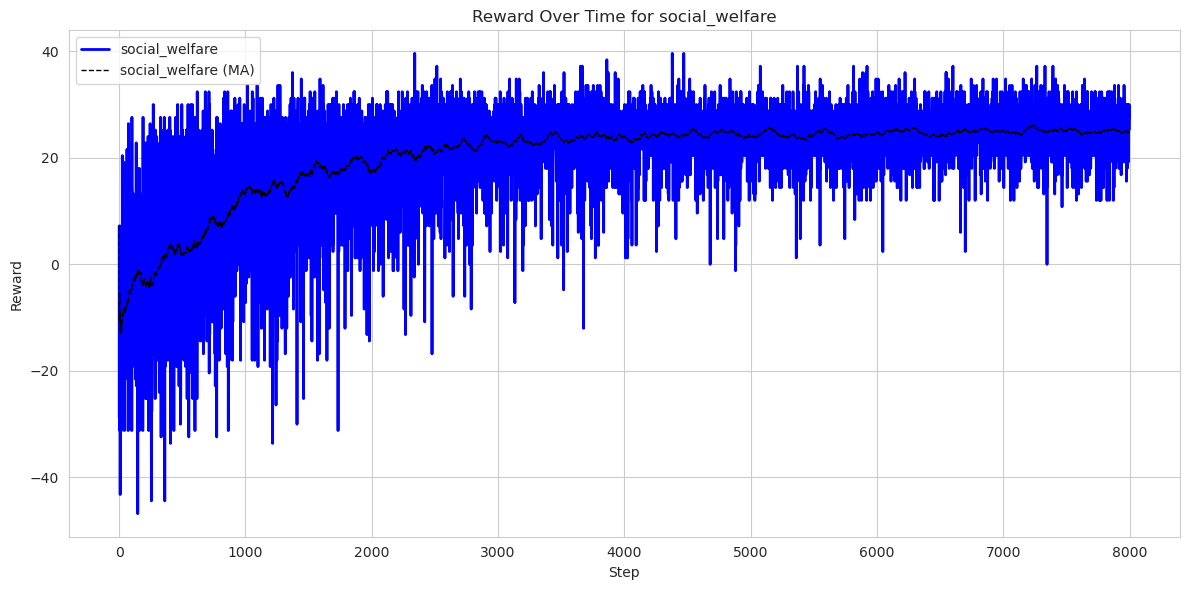

In [ ]:
plots.plot_reward_for("mean_reward", round_info)
plots.plot_reward_for("social_welfare", round_info)

Plotting Cumulative Rewards


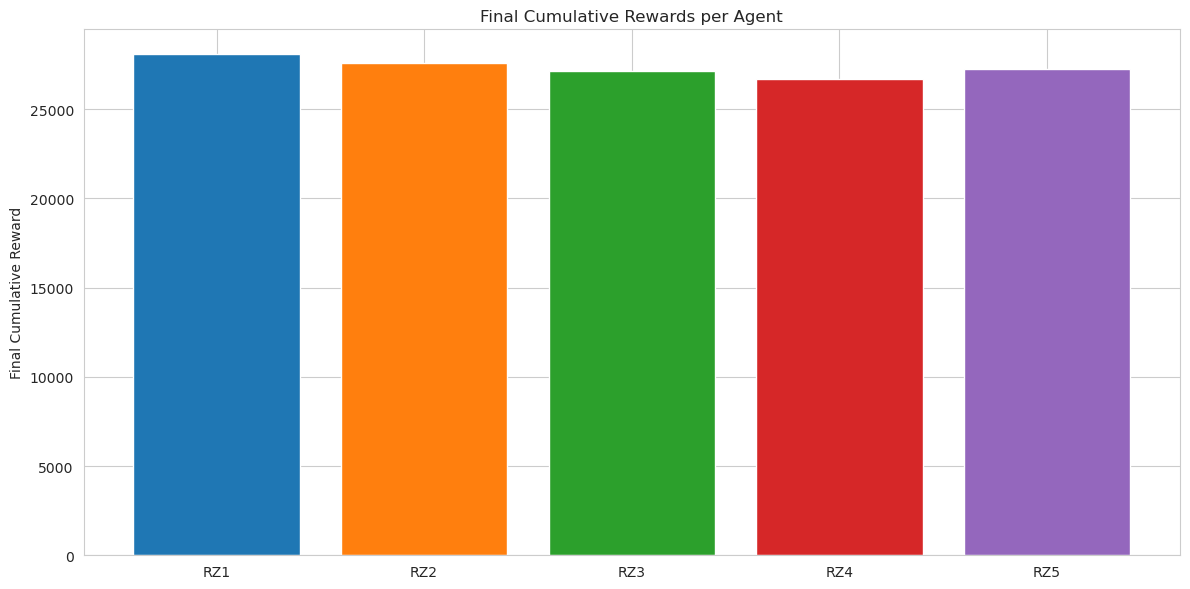

In [ ]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Plotting Q-Table Convergance


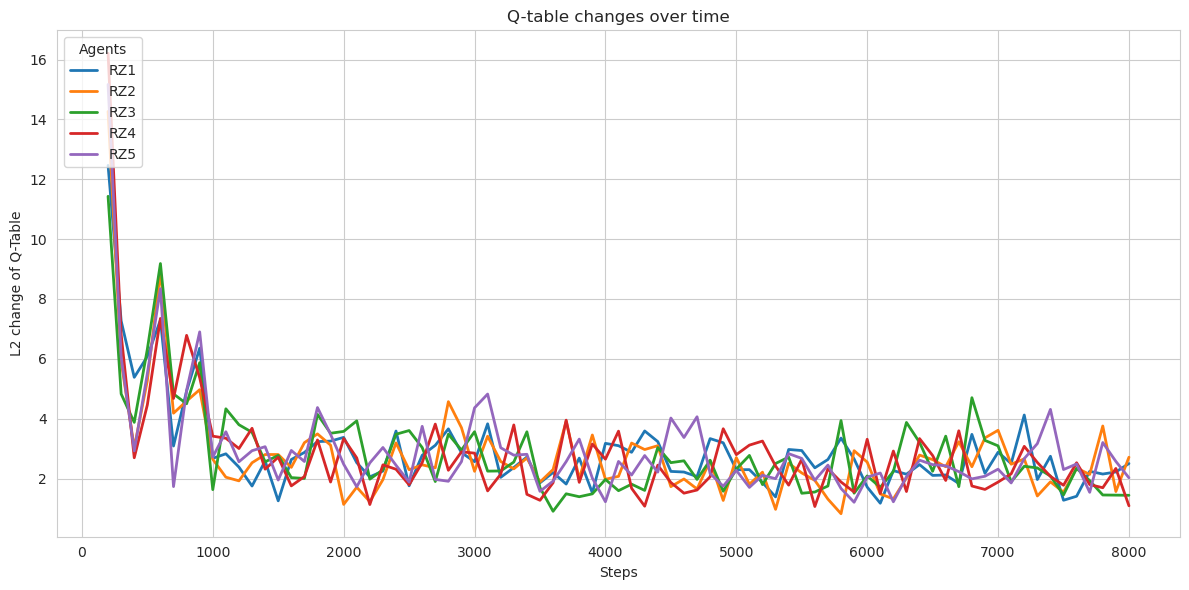

In [ ]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)